# **Rami KOCO - 170255063**

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras import Model
from sklearn.metrics import classification_report, confusion_matrix
import tqdm
import os
import cv2
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
trainPath='./drive/MyDrive/Data/train/'
testPath='./drive/MyDrive/Data/test/'
valPath='./drive/MyDrive/Data/train/'
classes = ['COVID-19/','Normal/','Pneumonia-Bacterial/','Pneumonia-Viral/']

In [ ]:
imgClassCovid = []
imgClassNormal = []
imgClassPBacterial = []
imgClassPViral = []

for i in classes:
  for img in os.listdir(trainPath + i):
    img = plt.imread(trainPath+i+img)
    img = cv2.resize(img, (224, 224))
    if(i =='COVID-19/' ) : imgClassCovid.append(img)
    if(i =='Normal/' ) : imgClassNormal.append(img)
    if(i =='Pneumonia-Bacterial/' ) : imgClassPBacterial.append(img)
    if(i =='Pneumonia-Viral/' ) : imgClassPViral.append(img)

In [ ]:
print("Eğitim Verisi COVID-19 Boyutu: ", len(imgClassCovid))
print("Eğitim Verisi Normal Boyutu: ", len(imgClassNormal))
print("Eğitim Verisi Pneumonia-Bacterial Boyutu: ", len(imgClassPBacterial))
print("Eğitim Verisi Pneumonia-Viral Boyutu: ", len(imgClassPViral))

Eğitim Verisi COVID-19 Boyutu:  1024
Eğitim Verisi Normal Boyutu:  2616
Eğitim Verisi Pneumonia-Bacterial Boyutu:  2400
Eğitim Verisi Pneumonia-Viral Boyutu:  1324


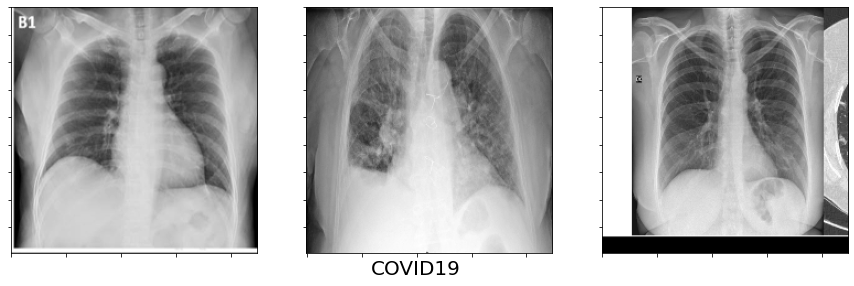

In [ ]:
f = plt.figure(figsize=(15,7))
f.suptitle('COVID19',fontsize=20)
f.subplots_adjust(top=2.35)
for i in range(3):
    sp = f.add_subplot(1,3,i+1)
    img = imgClassCovid[i]
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    plt.tick_params(labelbottom=False,
                labelleft=False,
                labelright=False,
                labeltop=False)
    plt.imshow(img_gray)
    plt.gray()
plt.show()

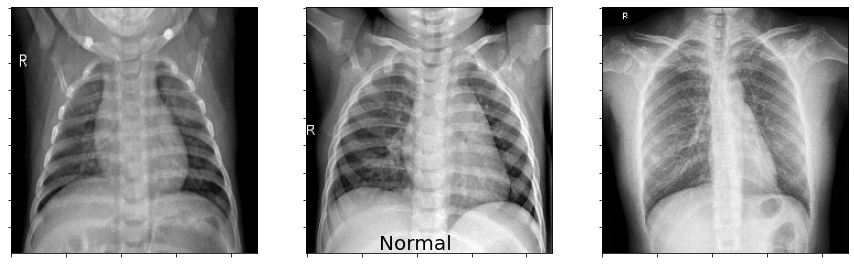

In [ ]:
f = plt.figure(figsize=(15,7))
f.suptitle('Pneumonia-Bacterial',fontsize=20)
f.subplots_adjust(top=2.25)
for i in range(3):
    sp = f.add_subplot(1,3,i+1)
    img = imgClassPBacterial[i]
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    plt.tick_params(labelbottom=False,
                labelleft=False,
                labelright=False,
                labeltop=False)
    plt.imshow(img_gray)
plt.gray()
plt.show()

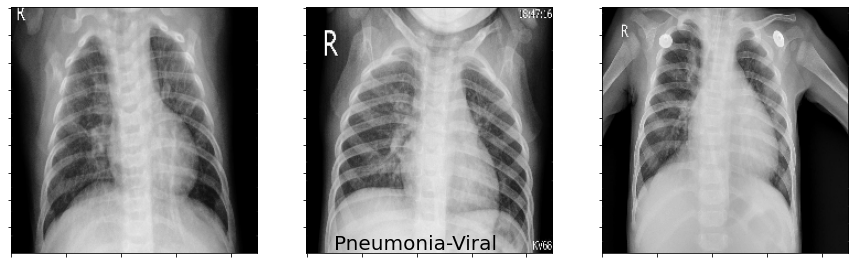

In [ ]:
f = plt.figure(figsize=(15,7))
f.suptitle('Pneumonia-Viral',fontsize=20)
f.subplots_adjust(top=2.25)
for i in range(3):
    sp = f.add_subplot(1,3,i+1)
    img = imgClassPViral[i]
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    plt.tick_params(labelbottom=False,
                labelleft=False,
                labelright=False,
                labeltop=False)
    plt.imshow(img_gray)
plt.gray()
plt.show()

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
        rotation_range=5,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen  = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
        rotation_range=5,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen  = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_dataset  = train_datagen.flow_from_directory(directory = trainPath,
                                                   target_size = (224,224),
                                                   class_mode = 'categorical',
                                                   batch_size = 64)

valid_dataset = valid_datagen.flow_from_directory(directory = valPath,
                                                  target_size = (224,224),
                                                  class_mode = 'categorical',
                                                  batch_size = 64)

test_dataset = test_datagen.flow_from_directory(directory = testPath,
                                                  target_size = (224,224),
                                                  class_mode = 'categorical',
                                                  batch_size = 64)
model_ResNet101V2 = tf.keras.applications.ResNet101V2(input_shape=(224,224,3),include_top=False,weights="imagenet")

for layer in model_ResNet101V2.layers:
    layer.trainable = False

Found 7364 images belonging to 4 classes.
Found 7364 images belonging to 4 classes.
Found 673 images belonging to 4 classes.
171327488/171317808 [==============================] - 1s 0us/step


In [ ]:
x = model_ResNet101V2.output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(4, activation = "softmax")(x)
model = Model(inputs= model_ResNet101V2.input , outputs = x)

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc')
]
model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy',metrics=METRICS)

In [ ]:
history=model.fit(train_dataset,validation_data=valid_dataset,epochs = 5)

Epoch 1/5
116/116 [==============================] - 485s 4s/step - loss: 5.5389 - accuracy: 0.8569 - precision: 0.7288 - recall: 0.6809 - auc: 0.8716 - val_loss: 0.4824 - val_accuracy: 0.9062 - val_precision: 0.8552 - val_recall: 0.7523 - val_auc: 0.9611
Epoch 2/5
116/116 [==============================] - 441s 4s/step - loss: 0.5132 - accuracy: 0.8967 - precision: 0.8255 - recall: 0.7442 - auc: 0.9538 - val_loss: 0.4582 - val_accuracy: 0.9067 - val_precision: 0.8356 - val_recall: 0.7806 - val_auc: 0.9629
Epoch 3/5
116/116 [==============================] - 435s 4s/step - loss: 0.5097 - accuracy: 0.8997 - precision: 0.8258 - recall: 0.7590 - auc: 0.9547 - val_loss: 0.4982 - val_accuracy: 0.9005 - val_precision: 0.8282 - val_recall: 0.7598 - val_auc: 0.9561
Epoch 4/5
116/116 [==============================] - 428s 4s/step - loss: 0.4704 - accuracy: 0.9031 - precision: 0.8307 - recall: 0.7690 - auc: 0.9601 - val_loss: 0.4258 - val_accuracy: 0.9128 - val_precision: 0.8434 - val_recall: 0

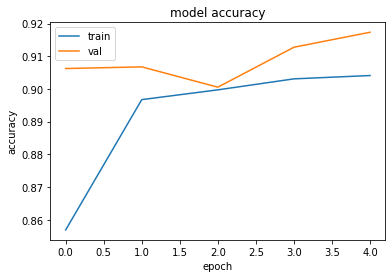

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

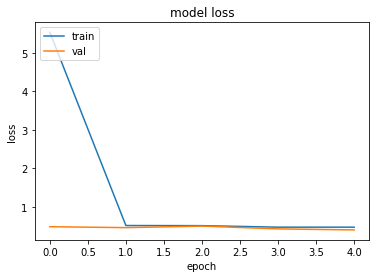

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
def test_Xy(data):
    data.reset()
    X, y = next(data)
    for i in tqdm.tqdm(range(int(data.n/data.batch_size)-1)): 
        img, label = next(data)
        X = np.append(X, img, axis=0 )
        y = np.append(y, label, axis=0)
    return X,y

In [ ]:
X_test,y_test = test_Xy(test_dataset)

100%|██████████| 9/9 [00:14<00:00,  1.58s/it]


In [ ]:
print('X_test:',X_test.shape,'y_test:',y_test.shape)

X_test: (640, 224, 224, 3) y_test: (640, 4)


In [ ]:
y_pred  = np.round(model.predict(X_test))

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       0.91      0.98      0.94       178
           2       0.80      0.84      0.82       290
           3       0.76      0.47      0.58       156

   micro avg       0.83      0.79      0.81       640
   macro avg       0.85      0.82      0.83       640
weighted avg       0.82      0.79      0.80       640
 samples avg       0.79      0.79      0.79       640



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


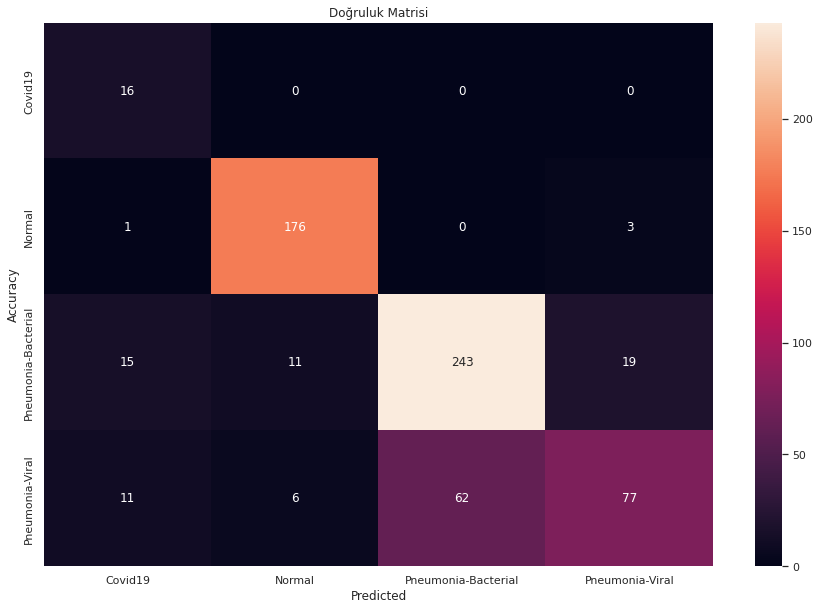

In [ ]:
import seaborn as sns

labels = ['Covid19','Normal','Pneumonia-Bacterial','Pneumonia-Viral']    

ax= plt.subplot()
sns.set(rc = {'figure.figsize':(10,10)})

cm = confusion_matrix(np.asarray(y_test).argmax(axis=1), np.asarray(y_pred).argmax(axis=1))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);

ax.set_xlabel('Predicted');ax.set_ylabel('Accuracy'); 
ax.set_title('Doğruluk Matrisi'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);